In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch

from mplsoccer import FontManager
fm_rubik = FontManager(('https://github.com/google/fonts/blob/main/ofl/rubikmonoone/'
                        'RubikMonoOne-Regular.ttf?raw=true'))

In [24]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(2302764)
#get team names
team1, team2 = df.team_name.unique()
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [25]:
pd.set_option('display.max_columns', None)
shots.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,sub_type_id,sub_type_name,body_part_id,body_part_name,x,y,outcome_id,outcome_name,under_pressure,counterpress,pass_cross,pass_assisted_shot_id,pass_goal_assist,shot_statsbomb_xg,end_z,shot_key_pass_id,shot_first_time,technique_id,technique_name,goalkeeper_position_id,goalkeeper_position_name,off_camera,out,pass_switch,pass_shot_assist,dribble_overrun,ball_recovery_recovery_failure,aerial_won,pass_deflected,foul_committed_advantage,foul_won_advantage,foul_won_defensive,dribble_nutmeg,substitution_replacement_id,substitution_replacement_name,pass_miscommunication,foul_committed_offensive,pass_cut_back,block_offensive,foul_committed_penalty,foul_won_penalty,shot_one_on_one,pass_no_touch,block_save_block,foul_committed_card_id,foul_committed_card_name,shot_redirect,block_deflection
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
08eb8fb6-02d1-4124-92e7-2fed285e9b81,40,1,00:00:51.155000,0,51,4,0.678002,2302764,16,Shot,243,AC Milan,3,From Free Kick,243,AC Milan,None,15116.0,Paolo Maldini,6.0,Left Back,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.6,87.0,Open Play,40.0,Right Foot,107.6,42.1,97.0,Goal,NaN,NaN,NaN,NaN,NaN,0.064727,2.2,0cdab0d4-29f6-48ec-a5a0-21dc85cd268c,True,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0afba362-b890-445f-a2e8-a880fdf6caf1,126,1,00:03:48.106000,3,48,11,0.304889,2302764,16,Shot,24,Liverpool,2,From Corner,24,Liverpool,None,34386.0,John Arne Semundseth Riise,16.0,Left Midfield,NaN,NaN,NaN,NaN,NaN,NaN,107.1,38.5,87.0,Open Play,38.0,Left Foot,98.4,33.3,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,0.031492,NaN,883f6fb5-e598-4fe4-84a4-99dfa08bc5b7,True,95.0,Volley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f1f292c0-5590-4108-b3bf-36d4f4aaf756,133,1,00:03:57.139000,3,57,12,0.614283,2302764,16,Shot,24,Liverpool,1,Regular Play,24,Liverpool,None,34389.0,Sami Hyypiä,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,119.2,41.9,87.0,Open Play,37.0,Head,106.9,44.4,100.0,Saved,NaN,NaN,NaN,NaN,NaN,0.034621,0.6,c9a47fc7-36dd-4295-b101-575756907433,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef380ac5-5548-4102-85dc-03f6e68a72e2,334,1,00:09:34.205000,9,34,24,0.405298,2302764,16,Shot,243,AC Milan,4,From Throw In,243,AC Milan,None,20142.0,Ivan Gennaro Gattuso,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,100.2,47.0,87.0,Open Play,40.0,Right Foot,86.5,53.5,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,0.006152,NaN,2afe7633-6c7f-4ccd-b900-2a09d8687262,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64cc7e5d-31f8-4ec0-9df6-ebe9b1d2880b,477,1,00:13:36.820000,13,36,36,0.410617,2302764,16,Shot,243,AC Milan,2,From Corner,243,AC Milan,None,34394.0,Hernán Jorge Crespo,24.0,Left Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,119.8,42.8,87.0,Open Play,37.0,Head,114.9,50.2,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,0.045944,NaN,1c246a65-f15a-4919-b162-17cb4f6933b0,NaN,93.0,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
events, related, freeze, players = parser.event(2302764)
TEAM = 'Liverpool'
OPPONENT = 'vs AC Milan , 04/05 UCL Final'

events.loc[events.tactics_formation.notnull(), 'tactics_id'] = events.loc[
    events.tactics_formation.notnull(), 'id']
events[['tactics_id', 'tactics_formation']] = events.groupby('team_name')[[
    'tactics_id', 'tactics_formation']].ffill()

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
players['position_abbreviation'] = players.position_id.map(formation_dict)


sub = events.loc[events.type_name == 'Substitution',
                 ['tactics_id', 'player_id', 'substitution_replacement_id',
                  'substitution_replacement_name']]
players_sub = players.merge(sub.rename({'tactics_id': 'id'}, axis='columns'),
                            on=['id', 'player_id'], how='inner', validate='1:1')
players_sub = (players_sub[['id', 'substitution_replacement_id', 'position_abbreviation']]
               .rename({'substitution_replacement_id': 'player_id'}, axis='columns'))
players = pd.concat([players, players_sub])
players.rename({'id': 'tactics_id'}, axis='columns', inplace=True)
players = players[['tactics_id', 'player_id', 'position_abbreviation']]

# add on the position the player was playing in the formation to the events dataframe
events = events.merge(players, on=['tactics_id', 'player_id'], how='left', validate='m:1')
# add on the position the receipient was playing in the formation to the events dataframe
events = events.merge(players.rename({'player_id': 'pass_recipient_id'},
                                     axis='columns'), on=['tactics_id', 'pass_recipient_id'],
                      how='left', validate='m:1', suffixes=['', '_receipt'])

In [28]:
events.groupby('team_name').tactics_formation.unique()

team_name
AC Milan     [41212]
Liverpool     [4411]
Name: tactics_formation, dtype: object

In [29]:
FORMATION = 4411.0
pass_cols = ['id', 'position_abbreviation', 'position_abbreviation_receipt']
passes_formation = events.loc[(events.team_name == team2) & (events.type_name == 'Pass') &
                              (events.tactics_formation == FORMATION) &
                              (events.position_abbreviation_receipt.notnull()), pass_cols].copy()
location_cols = ['position_abbreviation', 'x', 'y']
location_formation = events.loc[(events.team_name == team2) &
                                (events.type_name.isin(['Pass', 'Ball Receipt'])) &
                                (events.tactics_formation == FORMATION), location_cols].copy()

# average locations
average_locs_and_count = (location_formation.groupby('position_abbreviation')
                          .agg({'x': ['mean'], 'y': ['mean', 'count']}))
average_locs_and_count.columns = ['x', 'y', 'count']

# calculate the number of passes between each position (using min/ max so we get passes both ways)
passes_formation['pos_max'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .max(axis='columns'))
passes_formation['pos_min'] = (passes_formation[['position_abbreviation',
                                                'position_abbreviation_receipt']]
                               .min(axis='columns'))
passes_between = passes_formation.groupby(['pos_min', 'pos_max']).id.count().reset_index()
passes_between.rename({'id': 'pass_count'}, axis='columns', inplace=True)

# add on the location of each player so we have the start and end positions of the lines
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_min', right_index=True)
passes_between = passes_between.merge(average_locs_and_count, left_on='pos_max', right_index=True,
                                      suffixes=['', '_end'])

MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000
passes_between['width'] = (passes_between.pass_count / passes_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locs_and_count['marker_size'] = (average_locs_and_count['count']
                                         / average_locs_and_count['count'].max() * MAX_MARKER_SIZE)

In [30]:
from matplotlib.colors import to_rgba

MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(passes_between), 1))
c_transparency = passes_between.pass_count / passes_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

In [39]:
#open the data
parser = Sbopen()
df_match = parser.match(competition_id=72, season_id=30)
#our team
team = "Flamengo"
#get list of games by our team, either home or away
match_ids = df_match.loc[(df_match["home_team_name"] == team) | (df_match["away_team_name"] == team)]["match_id"].tolist()
#calculate number of games
no_games = len(match_ids)

df = parser.event(69258)[0]

df [df.type_name == 'Shot']

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,end_x,end_y,body_part_id,body_part_name,sub_type_id,sub_type_name,x,y,outcome_id,outcome_name,under_pressure,aerial_won,counterpress,pass_cross,pass_switch,technique_id,technique_name,dribble_nutmeg,shot_statsbomb_xg,end_z,goalkeeper_position_id,goalkeeper_position_name,shot_first_time,off_camera,foul_won_defensive,ball_recovery_recovery_failure,pass_deflected,block_deflection,out,pass_no_touch,pass_assisted_shot_id,pass_goal_assist,shot_key_pass_id,foul_committed_offensive,pass_shot_assist,shot_one_on_one,injury_stoppage_in_chain,pass_cut_back,foul_committed_card_id,foul_committed_card_name,dribble_overrun,substitution_replacement_id,substitution_replacement_name,foul_committed_advantage,foul_won_advantage,foul_committed_penalty,foul_won_penalty,block_offensive
183,eb46f1d3-aba3-430b-b994-c7c2417a9775,184,1,00:03:41.787000,3,41,7,0.383769,69258,16,Shot,1214,United States Women's,2,From Corner,1214,United States Women's,None,4949.0,Rosemary Kathleen Lavelle,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,119.3,44.0,38.0,Left Foot,87.0,Open Play,113.2,54.5,100.0,Saved,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,0.033160,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,3cf2c869-c8ff-48fa-845b-9cffd5904658,193,1,00:03:50.080000,3,50,7,0.999333,69258,16,Shot,1214,United States Women's,2,From Corner,1214,United States Women's,None,5085.0,Alexandra Morgan Carrasco,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,38.0,40.0,Right Foot,87.0,Open Play,107.3,33.7,98.0,Off T,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,0.078033,6.3,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,11fec3fa-48f3-4949-bbc4-8699d01c58f1,376,1,00:09:03.430000,9,3,16,0.715733,69258,16,Shot,1214,United States Women's,7,From Goal Kick,1214,United States Women's,None,6817.0,Christen Annemarie Press,21.0,Left Wing,NaN,NaN,NaN,NaN,NaN,NaN,120.0,37.3,37.0,Head,87.0,Open Play,113.8,32.6,97.0,Goal,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,0.045102,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a2625fd5-9346-4b5c-952a-be3006bb7894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,8c51b399-7b10-48c6-a8a2-55a566bfa1fc,651,1,00:15:08.585000,15,8,30,1.090631,69258,16,Shot,1214,United States Women's,1,Regular Play,1214,United States Women's,None,4949.0,Rosemary Kathleen Lavelle,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,120.0,41.7,38.0,Left Foot,87.0,Open Play,95.5,48.0,98.0,Off T,NaN,NaN,NaN,NaN,NaN,93.0,Normal,NaN,0.031658,5.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,045b0f9c-4bd8-4efd-b53b-51d12c60bc29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,51347d25-efea-44ec-9159-4ee6c1b01194,800,1,00:18:40.441000,18,40,37,0.583837,69258,16,Shot,865,England Women's,1,Regular Play,865,England Women's,None,10180.0,Ellen White,23.0,Center Forward,NaN,NaN,NaN,NaN,NaN,NaN,120.0,43.8,40.0,Right Foot,87.0,Open Play,113.4,37.9,97.0,Goal,NaN,NaN,NaN,NaN,NaN,91.0,Half Volley,NaN,0.220710,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45e709f8-e3db-423a-a09c-98726d25625c,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880,1d22bfa4-59ae-4681-b95a-65b221d7027e,881,1,00:21:24.913000,21,24,43,0.254400,69258,16,Shot,1214,United States Women's,3,From Free Kick,1214,United States Women's,None,4949.0,Rosemary Kathleen Lavelle,13.0,Right Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,104.0,41.0,40.0,Right Foot,87.0,Open Play,95.4,42.8,96.0,Blocked,NaN,NaN,NaN,NaN,NaN,95.0,Volley,NaN,0.037254,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [43]:
preshots_passes = pd.DataFrame()

for idx in match_ids:
    df = parser.event(idx)[0]
    df_shots = df[(df.type_name == 'Shot') & (df.shot_key_pass_id.isnull() == False) & (df.team_name == team) & (df.sub_type_name == 'Open Play')]
    pass_ids = df_shots.shot_key_pass_id.values
    mask_passes = []
    for i in df.id.values:
        if i in pass_ids:
            mask_passes.append(True)
        else:
            mask_passes.append(False)
    df_passes = df.loc[mask_passes, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
    preshots_passes = pd.concat([df_passes, preshots_passes])

AttributeError: 'DataFrame' object has no attribute 'x'

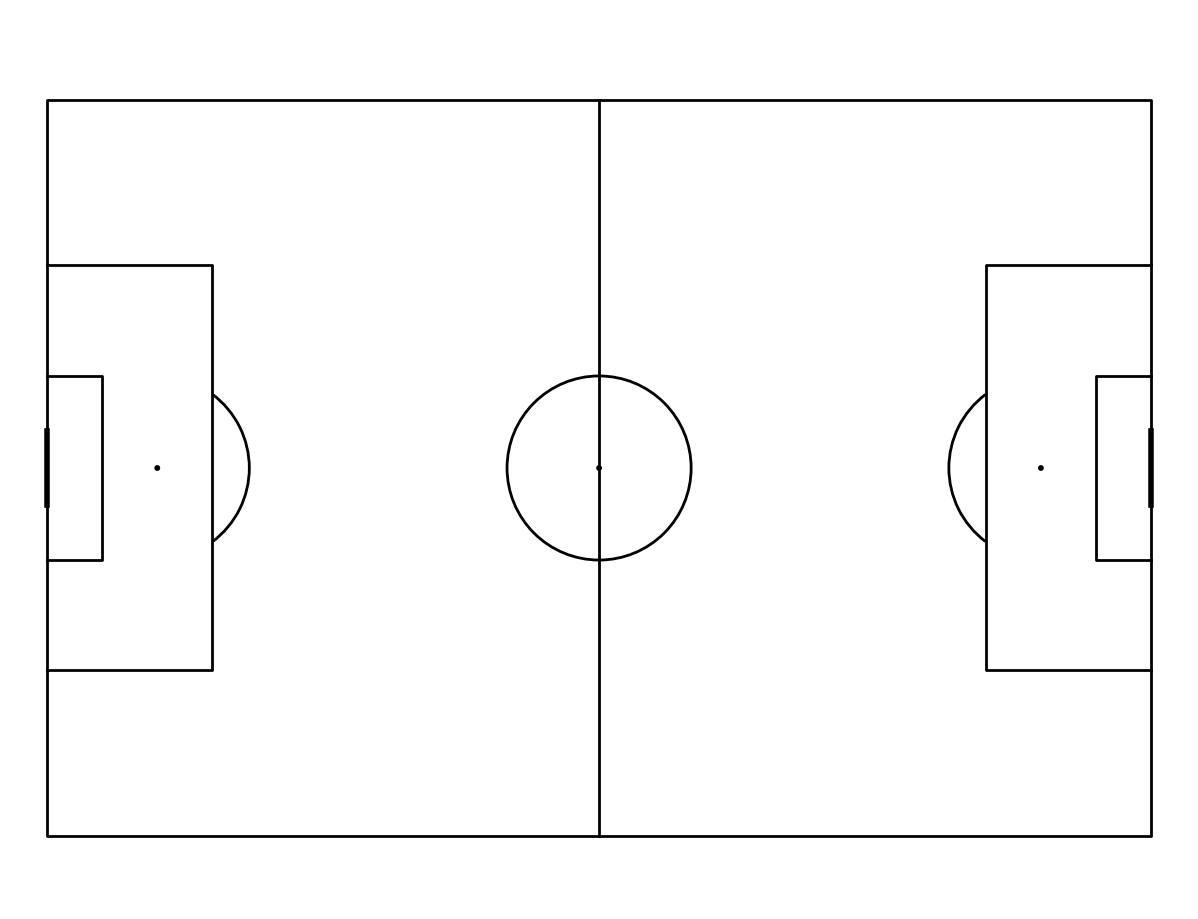

In [48]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram
bin_statistic = pitch.bin_statistic(preshots_passes, df_passes, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Mapa de calor de chutes do ' + team , fontsize = 30)
plt.show()